# Mall Customers-DBSCAN
<img src= "https://i.postimg.cc/g201vJ29/Chat-GPT-Image-Aug-31-2025-04-22-43-PM.png" width="1000" height="400">

* Introduction to DBSCAN on Mall Customers Dataset

The Mall Customers dataset contains customer demographic information such as Age, Gender, Annual Income, and Spending Score. Businesses often use this dataset to segment customers into groups for targeted marketing strategies.

Traditional clustering methods like K-Means require the number of clusters to be defined in advance, but in real-world customer data, the number of natural groupings may not be known. This is where DBSCAN (Density-Based Spatial Clustering of Applications with Noise) becomes useful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import parallel_coordinates, radviz


In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
db = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = db.fit_predict(X_scaled)

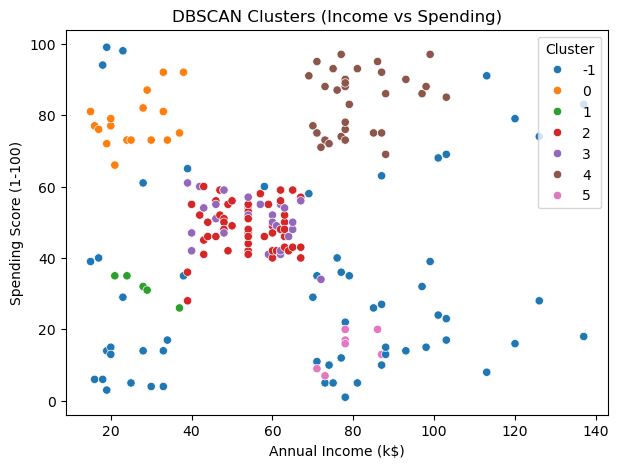

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=df, palette="tab10")
plt.title("DBSCAN Clusters (Income vs Spending)")
plt.show()

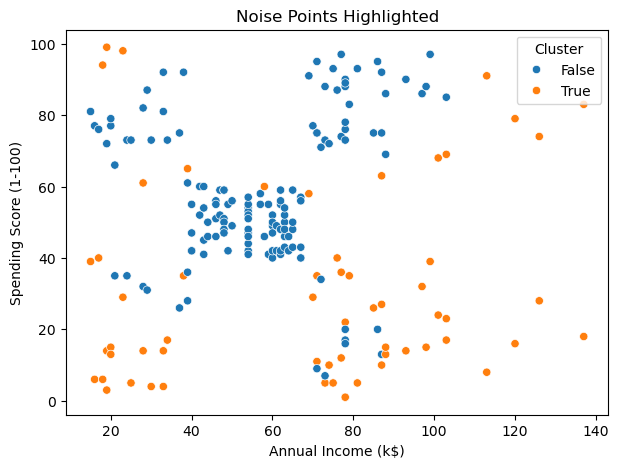

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue=df['Cluster']==-1, data=df)
plt.title("Noise Points Highlighted")
plt.show()

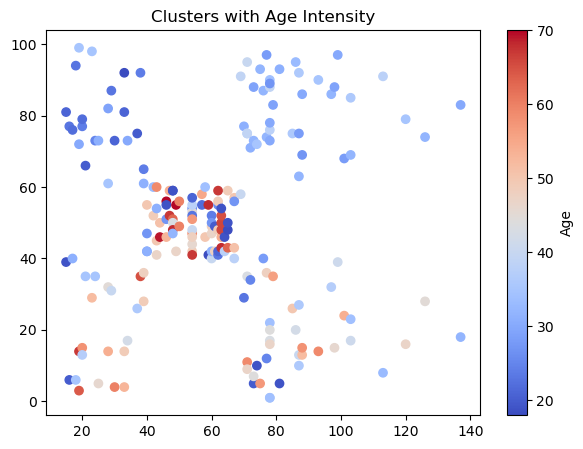

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Age'], cmap="coolwarm")
plt.colorbar(label="Age")
plt.title("Clusters with Age Intensity")
plt.show()

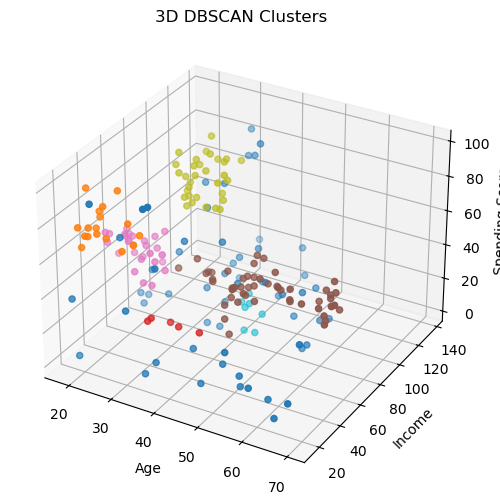

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap="tab10")
ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Spending Score")
plt.title("3D DBSCAN Clusters")
plt.show()

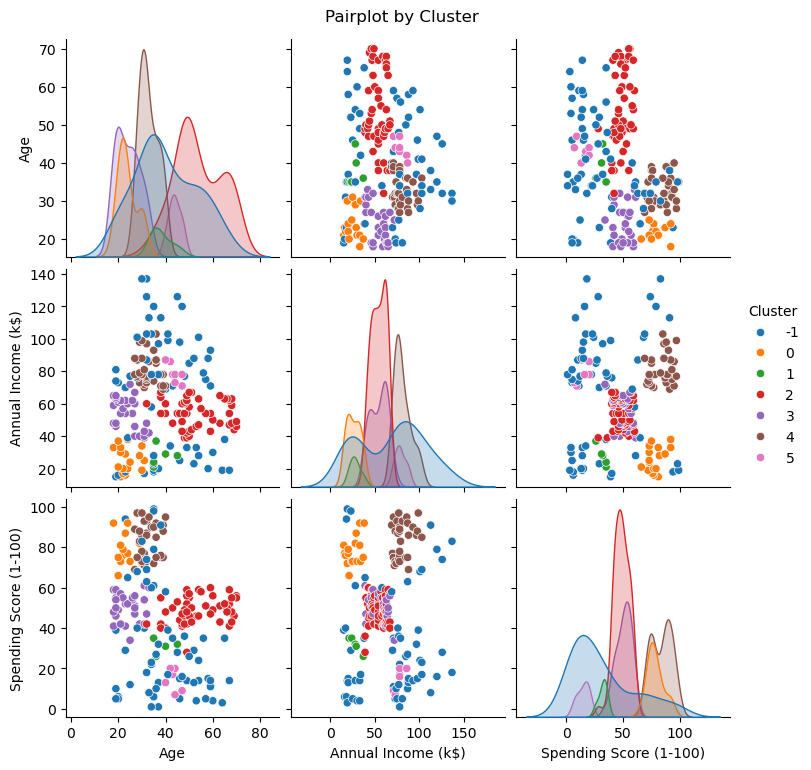

In [11]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)','Cluster']], hue="Cluster", palette="tab10")
plt.suptitle("Pairplot by Cluster", y=1.02)
plt.show()

C:\Users\rajul\AppData\Local\Temp\ipykernel_16588\1904900412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="Set2")


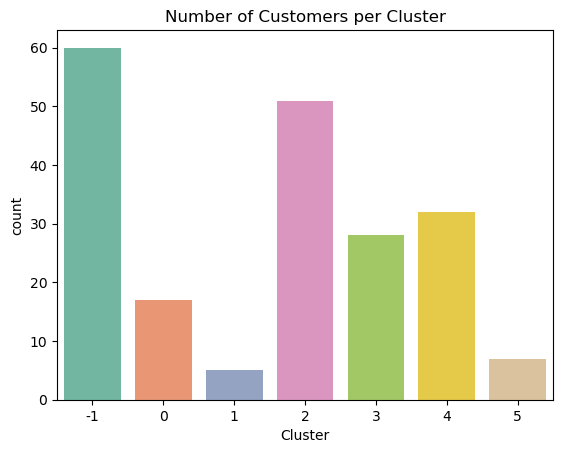

In [12]:
sns.countplot(x="Cluster", data=df, palette="Set2")
plt.title("Number of Customers per Cluster")
plt.show()

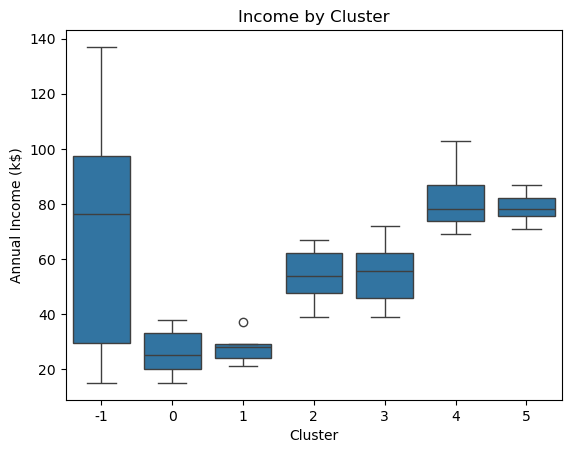

In [13]:
sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df)
plt.title("Income by Cluster")
plt.show()

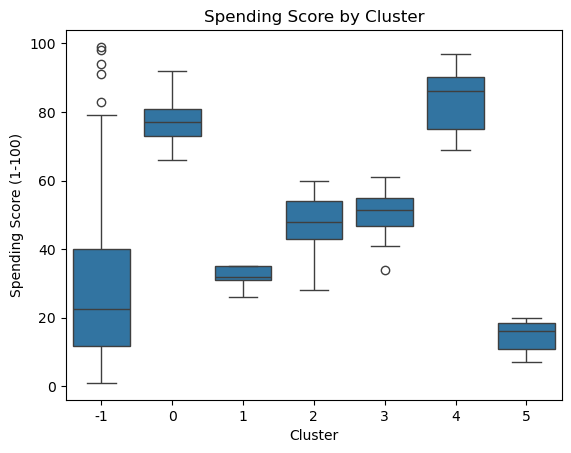

In [14]:
sns.boxplot(x="Cluster", y="Spending Score (1-100)", data=df)
plt.title("Spending Score by Cluster")
plt.show()

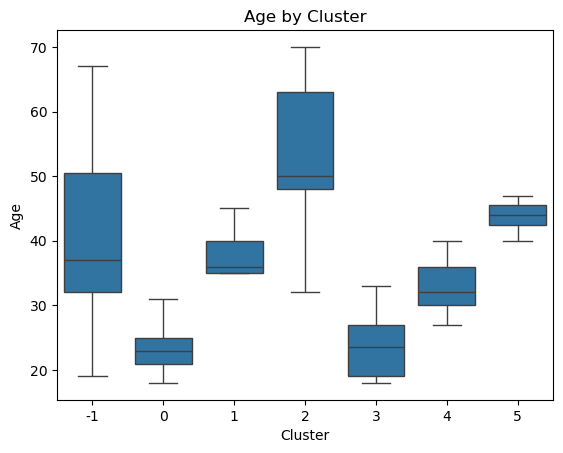

In [15]:
sns.boxplot(x="Cluster", y="Age", data=df)
plt.title("Age by Cluster")
plt.show()

C:\Users\rajul\AppData\Local\Temp\ipykernel_16588\446708773.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Cluster", y="Annual Income (k$)", data=df, palette="husl")


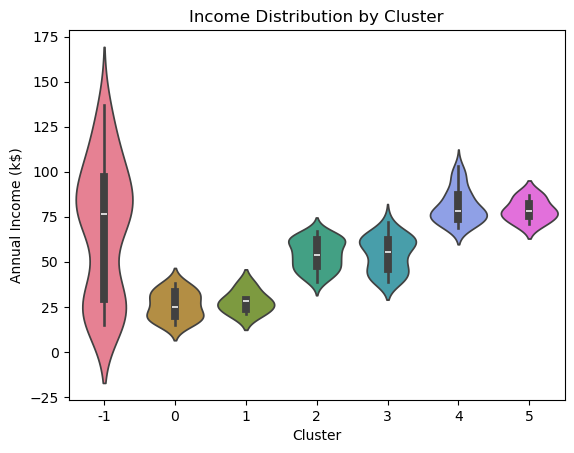

In [16]:
sns.violinplot(x="Cluster", y="Annual Income (k$)", data=df, palette="husl")
plt.title("Income Distribution by Cluster")
plt.show()


C:\Users\rajul\AppData\Local\Temp\ipykernel_16588\2495087717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Cluster", y="Spending Score (1-100)", data=df, palette="coolwarm")


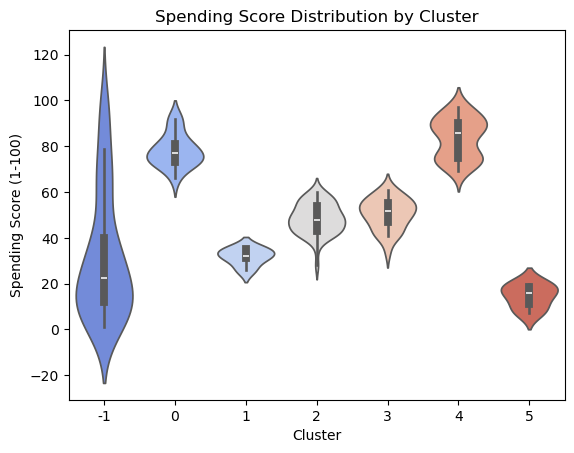

In [17]:
sns.violinplot(x="Cluster", y="Spending Score (1-100)", data=df, palette="coolwarm")
plt.title("Spending Score Distribution by Cluster")
plt.show()


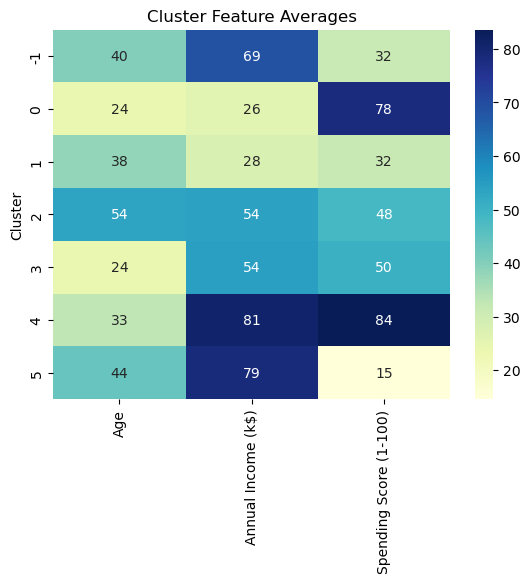

In [18]:
cluster_means = df.groupby("Cluster")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Feature Averages")
plt.show()

In [19]:
import math
categories = list(cluster_means.columns)
N = len(categories)
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].tolist()
    values += values[:1]  # repeat first for closure
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

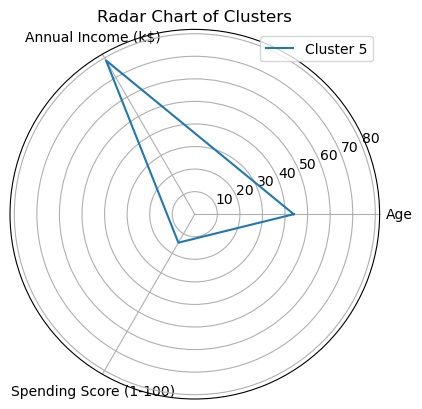

In [20]:
  plt.polar(angles, values, label=f"Cluster {cluster}")
plt.xticks(angles[:-1], categories)
plt.title("Radar Chart of Clusters")
plt.legend()
plt.show()


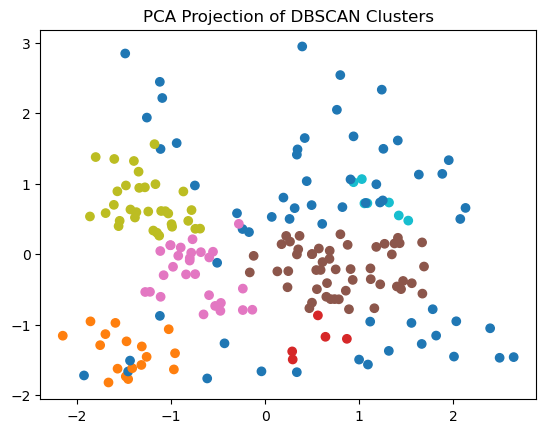

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Cluster'], cmap="tab10")
plt.title("PCA Projection of DBSCAN Clusters")
plt.show()

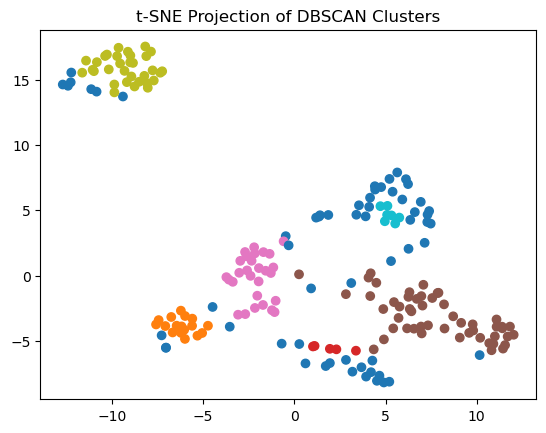

In [23]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(X_scaled)
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=df['Cluster'], cmap="tab10")
plt.title("t-SNE Projection of DBSCAN Clusters")
plt.show()

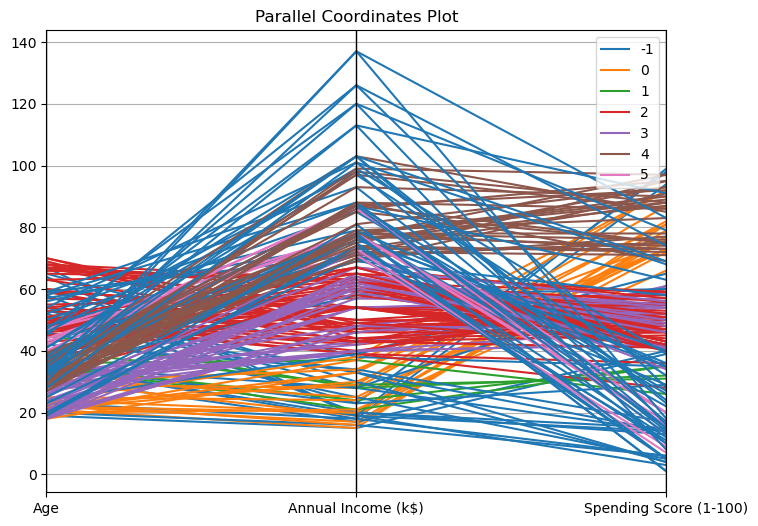

In [24]:
plt.figure(figsize=(8,6))
parallel_coordinates(df[['Age','Annual Income (k$)','Spending Score (1-100)','Cluster']], "Cluster", color=sns.color_palette("tab10"))
plt.title("Parallel Coordinates Plot")
plt.show()


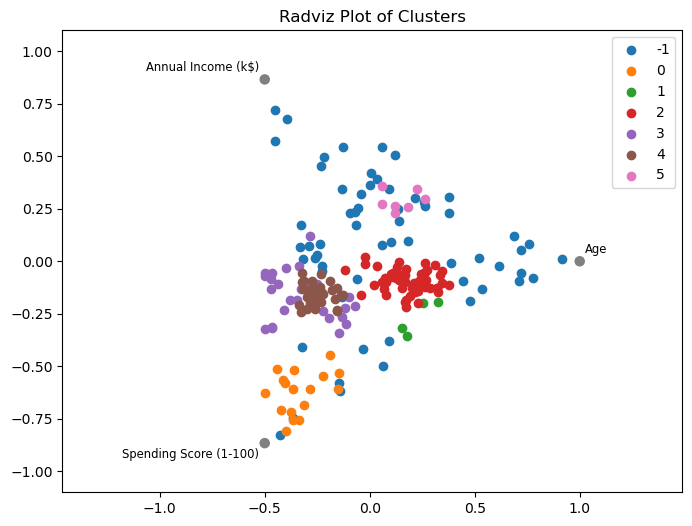

In [25]:
plt.figure(figsize=(8,6))
radviz(df[['Age','Annual Income (k$)','Spending Score (1-100)','Cluster']], "Cluster", color=sns.color_palette("tab10"))
plt.title("Radviz Plot of Clusters")
plt.show()

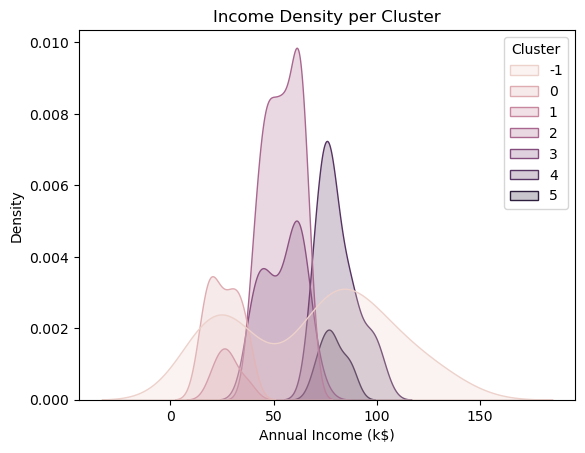

In [26]:
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Cluster", fill=True)
plt.title("Income Density per Cluster")
plt.show()


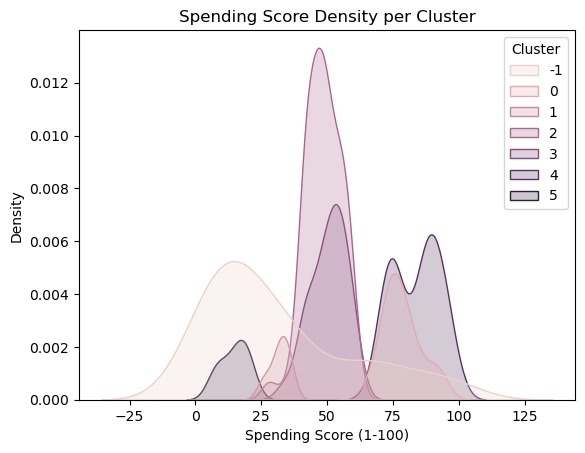

In [27]:
sns.kdeplot(data=df, x="Spending Score (1-100)", hue="Cluster", fill=True)
plt.title("Spending Score Density per Cluster")
plt.show()

In [28]:
if len(set(df['Cluster'])) > 1:
    score = silhouette_score(X_scaled, df['Cluster'])
    print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.185
